<a href="https://colab.research.google.com/github/Faiqazmi/DataScience_Portofolio/blob/main/Project_COVID_19_Clustering_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective Project
- ## Clustering Model
- ## Forecasting Model

# Clustering Case Project

### Role Sub-Objective Clustering Case Project
- Problem Statement: 
    - ##### Andi Safira
- Data Cleaning and Processing: 
    - ##### Andi Safira
- EDA: 
    - ##### Andi Safira
- Modelling: 
    - ##### Rahil Atansa, Faiq Azmi
- Conclusion:
    - ##### Team
- Reference: 
    - ##### Team

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt  
import seaborn as sns 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/covid_19_data.csv')

# Problem Statement

Proses analisis ini akan memecahkan beberapa permasalahan, seperti:

1. Bagaimana perbandingan performa dari k-means dan k-medoid clustering model untuk klasterisasi keketatan mobilitas di saat pandemi Covid-19?

2. Berapa jumlah klaster optimal berdasarkan hasil elbow dan silhoutte analysis?

3. Solusi-solusi dari permasalahan mobilitas yang muncul selama masa pandemi Covid-19?

# Data Cleaning and Pre-Processing

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
# Hapus kolom yang tidak diperlukan
df = df.drop(['SNo', 'ObservationDate', 'Last Update'], axis=1)

In [ ]:
# Meng-SUM nilai Confirmed, Deaths, dan Recovered berdasarkan Colomn Country
df = df.groupby(['Country/Region']).sum().reset_index()

In [ ]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  229 non-null    object 
 1   Confirmed       229 non-null    float64
 2   Deaths          229 non-null    float64
 3   Recovered       229 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.3+ KB


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  229 non-null    object 
 1   Confirmed       229 non-null    float64
 2   Deaths          229 non-null    float64
 3   Recovered       229 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.3+ KB


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered
count,2.290000e+02,2.290000e+02,2.290000e+02
mean,1.146378e+08,2.724948e+06,6.746829e+07
std,4.992496e+08,1.087101e+07,2.634108e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.644640e+05,4.305000e+03,2.626010e+05
50%,6.148539e+06,9.060000e+04,3.797948e+06
75%,5.016817e+07,8.344640e+05,3.710158e+07
max,6.049146e+09,1.233038e+08,2.900590e+09


In [ ]:
df.describe(include='O')

,Country/Region
count,229
unique,229
top,Bhutan
freq,1


In [ ]:
col_str = ['Country/Region']
for i in col_str:
  print('Unique value dari kolom "{a}" adalah :'.format(a=i))
  print(df[i].unique())
  print('dengan total : {}'.format(len(df[i].unique())))
  print('')

Unique value dari kolom "Country/Region" adalah :
[' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic'
 'East Timor' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia' 'Gambia, The'
 'Georgia' 'G

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

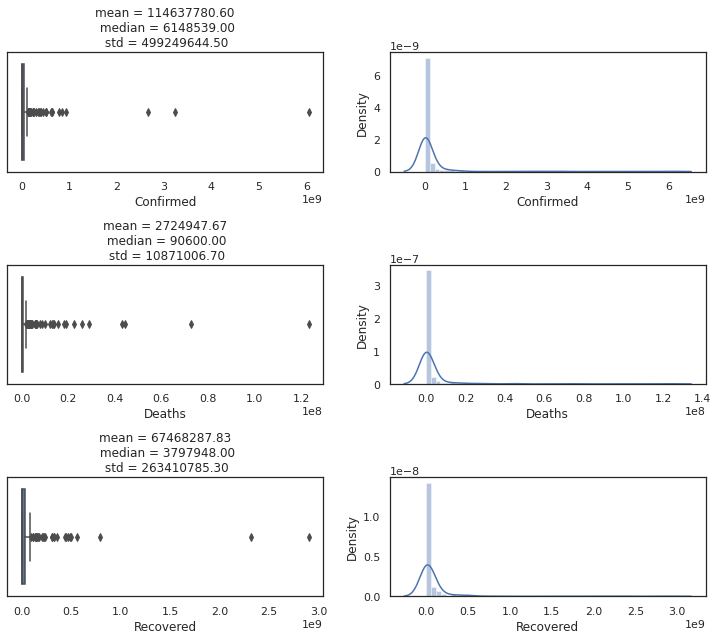

In [ ]:
sns.set(style='white')
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Confirmed','Deaths', 'Recovered']
observasi_num(kolom_numerik)

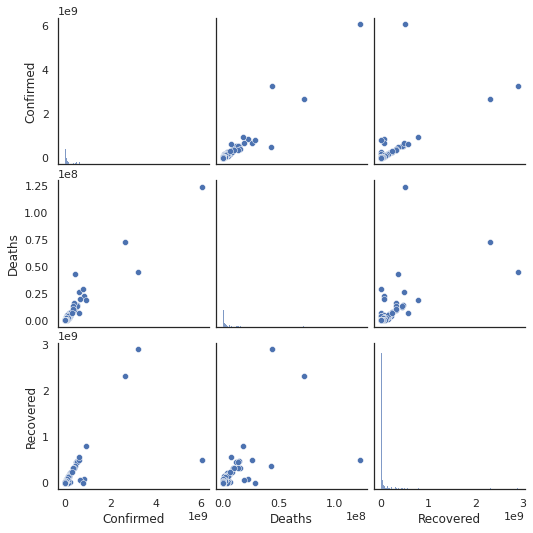

In [ ]:
sns.pairplot(df)

# Pre-Modelling

## Feature Scaling

In [ ]:
#Mengtransform nilai pada kolom confirmed, deaths dan recovered agar memiliki rentang yang sama (0 - 1) 
from sklearn.preprocessing import MinMaxScaler

kolom_numerik = ['Confirmed','Deaths', 'Recovered']

# Statistik sebelum Scalling
print('Statistik Sebelum Scalling\n')
print(df[kolom_numerik].describe())

# Scalling
df_scalled = MinMaxScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_scalled = pd.DataFrame(data=df_scalled, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil scalling\n')
print(df_scalled.head())

print('Statistik hasil scalling\n')
print(df_scalled.describe())

Statistik Sebelum Scalling

          Confirmed        Deaths     Recovered
count  2.290000e+02  2.290000e+02  2.290000e+02
mean   1.146378e+08  2.724948e+06  6.746829e+07
std    4.992496e+08  1.087101e+07  2.634108e+08
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.644640e+05  4.305000e+03  2.626010e+05
50%    6.148539e+06  9.060000e+04  3.797948e+06
75%    5.016817e+07  8.344640e+05  3.710158e+07
max    6.049146e+09  1.233038e+08  2.900590e+09
Contoh hasil scalling

      Confirmed    Deaths  Recovered
0  1.653126e-10  0.000000   0.000000
1  3.306252e-10  0.000000   0.000000
2  2.814685e-03  0.005426   0.004642
3  3.268043e-03  0.003049   0.004808
4  4.576573e-03  0.006768   0.006536
Statistik hasil scalling

        Confirmed      Deaths   Recovered
count  229.000000  229.000000  229.000000
mean     0.018951    0.022099    0.023260
std      0.082532    0.088164    0.090813
min      0.000000    0.000000    0.000000
25%      0.000060    0.000035    0.000091
50%      0.001016

In [ ]:
df_scalled.head()

,Confirmed,Deaths,Recovered
0,1.653126e-10,0.000000,0.000000
1,3.306252e-10,0.000000,0.000000
2,2.814685e-03,0.005426,0.004642
3,3.268043e-03,0.003049,0.004808
4,4.576573e-03,0.006768,0.006536


# Modelling

## K-Means

In [ ]:
#install library yang dibutuhkan
!pip install scikit-learn
!pip install matplotlib
!pip install yellowbrick

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#import library
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


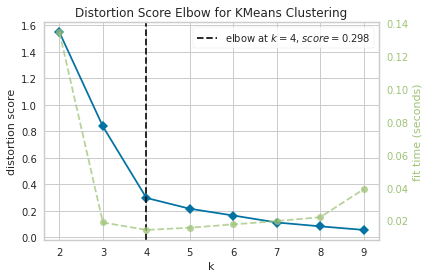

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Mencari nilai optimal k menggunakan elbow method
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df_scalled[['Confirmed','Deaths', 'Recovered']])
visualizer.show() 

Untuk 2 clusters, nilai inersia = 1.5479504341649062
Untuk 3 clusters, nilai inersia = 0.8371546163126469
Untuk 4 clusters, nilai inersia = 0.2976887477409753
Untuk 5 clusters, nilai inersia = 0.2160265676659727
Untuk 6 clusters, nilai inersia = 0.16334445910562562
Untuk 7 clusters, nilai inersia = 0.1122316121361511
Untuk 8 clusters, nilai inersia = 0.08289919095259357
Untuk 9 clusters, nilai inersia = 0.05628908549352432
Untuk 2 clusters, silhouette score = 0.9561283458663334
Untuk 3 clusters, silhouette score = 0.9542139646510039
Untuk 4 clusters, silhouette score = 0.8738259082028882
Untuk 5 clusters, silhouette score = 0.864700624504498
Untuk 6 clusters, silhouette score = 0.8507209459428079
Untuk 7 clusters, silhouette score = 0.785931121860914
Untuk 8 clusters, silhouette score = 0.7594369782927054
Untuk 9 clusters, silhouette score = 0.7590008140687879


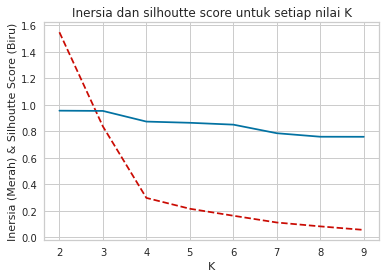

In [ ]:
#Melihat nilai inersia untuk setiap nilai k
inertia = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scalled[['Confirmed','Deaths', 'Recovered']])
    inertia.append(km.inertia_)
    print("Untuk {} clusters, nilai inersia = {}".format(k, km.inertia_))

print("========================================")

#Melihat silhoutte score untuk setiap nilai k
from sklearn.metrics import silhouette_samples, silhouette_score
sh_list_mea = []
k_rng = range(2,10)
for num_clusters in k_rng:
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(df_scalled[['Confirmed','Deaths', 'Recovered']].values)
   
    score = silhouette_score(df_scalled[['Confirmed','Deaths', 'Recovered']].values, cluster_labels)
    sh_list_mea.append(score)
    print("Untuk {} clusters, silhouette score = {}".format(num_clusters, score))
    
plt.title("Inersia dan silhoutte score untuk setiap nilai K")
plt.xlabel('K')
plt.ylabel('Inersia (Merah) & Silhoutte Score (Biru)')
plt.plot(k_rng,inertia, color = 'r', linestyle = 'dashed')
plt.plot(k_rng,sh_list_mea, color = 'b')
plt.show()

##### Jadi, berdasarkan elbow method, kami memilih nilai 4 untuk jumlah cluster dengan silhoutte score = 0.8738259082028882 

In [ ]:
#Membuat model untuk prediksi cluster dan array untuk menyimpan prediksi cluster untuk setiap negara
km = KMeans(n_clusters=4, random_state = 42)
y_predicted = km.fit_predict(df_scalled[['Confirmed','Deaths', 'Recovered']])
#Menambahkan angka 1 pada masing-masing nilai cluster, karena cluster dimulai dari angka 0
y_predicted = y_predicted + 1
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
#Menambahkan kolom 'Cluster' pada dataframe df dari nilai cluster hasil prediksi
df_kmeans = df.copy()
df_kmeans['Cluster']=y_predicted
#Mengubah tipe data kolom Cluster menjadi object
df_kmeans['Cluster'] = df_kmeans['Cluster'].astype('str')
df_kmeans.head()

,Country/Region,Confirmed,Deaths,Recovered,Cluster
0,Azerbaijan,1.0,0.0,0.0,2
1,"('St. Martin',)",2.0,0.0,0.0,2
2,Afghanistan,17026442.0,669075.0,13464399.0,2
3,Albania,19768869.0,375955.0,13945256.0,2
4,Algeria,27684358.0,834464.0,18959299.0,2


In [ ]:
#Memvisualisasikan hasil clustrering
import plotly.express as px
fig = px.scatter_3d(df_kmeans, x='Confirmed', y='Deaths', z='Recovered', color='Cluster')

fig.show()

In [ ]:
df_out_means = df_kmeans.groupby(by = 'Cluster').sum()[['Confirmed','Deaths', 'Recovered']].reset_index()
df_out_means

,Cluster,Confirmed,Deaths,Recovered
0,1,7.967701e+09,252768244.0,4.968624e+09
1,2,6.354849e+09,130891678.0,4.763976e+09
2,3,5.880356e+09,117049333.0,5.214267e+09
3,4,6.049146e+09,123303762.0,5.033710e+08


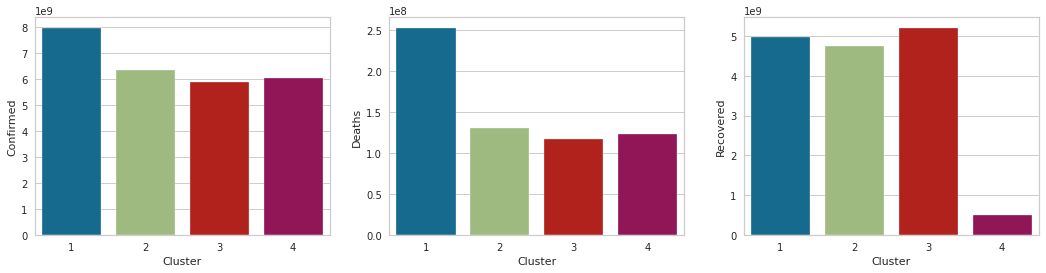

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'Cluster',y = 'Confirmed', data = df_out_means)
plt.subplot(1,3,2)
sns.barplot(x= 'Cluster',y = 'Deaths', data = df_out_means)
plt.subplot(1,3,3)
sns.barplot(x= 'Cluster',y = 'Recovered', data = df_out_means)
plt.show()

## K-Medoids

##### Coba 1

In [ ]:
pip install scikit-learn-extra


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kneed

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

# Mencari nilai K menggunakan perhitungan inertia dan silhouette
print("- Nilai Inertia pada setiap K (medoids)")
print("")
inertia_list = []
for num_clusters in range(1, 11):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(df_scalled[['Confirmed','Deaths','Recovered']])
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")

print("="*60)
print("")
print("- Nilai silhouette pada setiap K (medoids)")
print("")

sh_list_med = []
for num_clusters in range(2, 11):
    kmedoids = KMedoids(n_clusters=num_clusters)
    cluster_labels = kmedoids.fit_predict(df_scalled[['Confirmed','Deaths','Recovered']])
   
    score = silhouette_score(df_scalled[['Confirmed','Deaths','Recovered']], cluster_labels)
    sh_list_med.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

- Nilai Inertia pada setiap K (medoids)

The inertia of 1 clusters : 9.148575694850564
The inertia of 2 clusters : 6.722654797505051
The inertia of 3 clusters : 5.935514032427156
The inertia of 4 clusters : 5.467465552055652
The inertia of 5 clusters : 5.355131609944504
The inertia of 6 clusters : 5.303254995482906
The inertia of 7 clusters : 5.272882652466728
The inertia of 8 clusters : 5.25896192681515
The inertia of 9 clusters : 5.2499083041117025
The inertia of 10 clusters : 5.247592517125482

- Nilai silhouette pada setiap K (medoids)

For n_clusters = 2, silhouette score is 0.8575709936104412)
For n_clusters = 3, silhouette score is 0.5712650011623337)
For n_clusters = 4, silhouette score is 0.6054395622647571)
For n_clusters = 5, silhouette score is 0.4982443153427611)
For n_clusters = 6, silhouette score is 0.4183726839507138)
For n_clusters = 7, silhouette score is 0.37489928745774487)
For n_clusters = 8, silhouette score is 0.35585228714306383)
For n_clusters = 9, silhouette 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


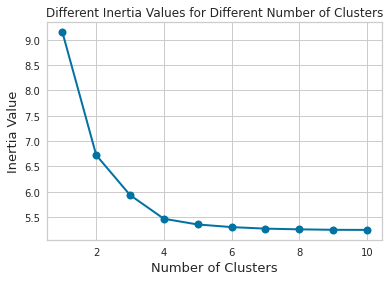

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


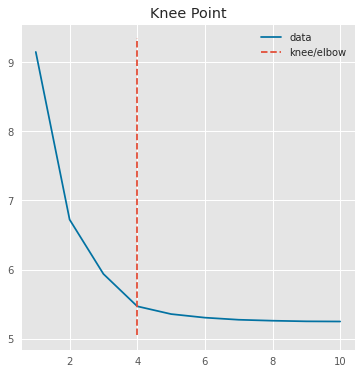

In [ ]:
# Plot untuk inertia
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")

# Menentukan nilai k optimal menggunakan library KneeLocator 
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
plt.style.use('ggplot')
kneedle.plot_knee()
plt.show()

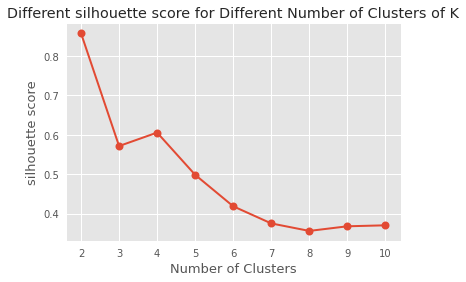

In [ ]:
# Plot untuk silhouette

plt.plot(range(2,11),sh_list_med, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters of K")
plt.show()

##### Berdasarkan perhitungan score inertia dan score silhouette, K yang optimal untuk model clustering K-Medoids adalah K(medoids) yang bernilai 4

In [ ]:
df_kmedoid = df.copy()
k_medoids = KMedoids(n_clusters = 4, random_state = 42)
k_medoids.fit_predict(df_scalled[['Confirmed','Deaths', 'Recovered']])
labels = k_medoids.labels_ + 1
df_kmedoid['Cluster'] = labels
df_kmedoid.head()

,Country/Region,Confirmed,Deaths,Recovered,Cluster
0,Azerbaijan,1.0,0.0,0.0,1
1,"('St. Martin',)",2.0,0.0,0.0,1
2,Afghanistan,17026442.0,669075.0,13464399.0,1
3,Albania,19768869.0,375955.0,13945256.0,1
4,Algeria,27684358.0,834464.0,18959299.0,3


In [ ]:
#Memvisualisasikan hasil clustrering
import plotly.express as px
fig = px.scatter_3d(df_kmedoid, x='Confirmed', y='Deaths', z='Recovered', color='Cluster')

fig.show()

In [ ]:
df_out_medoid = df_kmedoid.groupby(by = 'Cluster').sum()[['Confirmed','Deaths', 'Recovered']].reset_index()
df_out_medoid

,Cluster,Confirmed,Deaths,Recovered
0,1,5.304570e+08,8943667.0,4.264507e+08
1,2,2.614674e+09,54448407.0,2.270342e+09
2,3,3.209718e+09,67499604.0,2.067184e+09
3,4,1.989720e+10,493121339.0,1.068626e+10


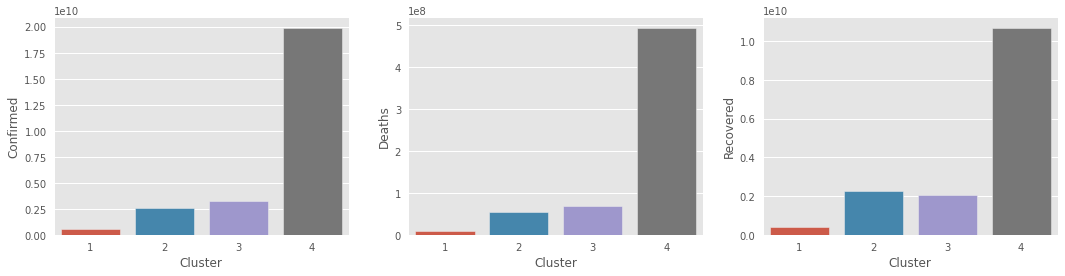

In [ ]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'Cluster',y = 'Confirmed', data = df_out_medoid)
plt.subplot(1,3,2)
sns.barplot(x= 'Cluster',y = 'Deaths', data = df_out_medoid)
plt.subplot(1,3,3)
sns.barplot(x= 'Cluster',y = 'Recovered', data = df_out_medoid)
plt.show()

In [ ]:
# Perbandingan 2 model untuk nilai inertia dan silhouette dengan k = 4 di setiap model


dfGen = lambda **x: pd.DataFrame(x)

df_conclusion = dfGen(nilai_kmeans=[inertia[2], sh_list_mea[2]], nilai_kmedoid=[inertia_list[3], sh_list_med[2]])
df_conclusion.rename({0:'Inertia Score', 1:'Silhouette Score'}, axis = 0, inplace=True)

df_conclusion

,nilai_kmeans,nilai_kmedoid
Inertia Score,0.297689,5.467466
Silhouette Score,0.873826,0.605440


##### Conclusion Model : 
Jadi, untuk model yang dapat dibilang memiliki performa yang baik adalah model clustering K-MEANS berdasarkan :
- Nilai Inertia K-MEANS lebih rendah dari nilai Inertia K-MEDOID  
- Nilai Silhouette K-MEANS lebih tinggi dari nilai Silhouette K-MEDOID 

# Conclusion Clustering Case Project

1. Kesimpulan: Terdapat 4 kluster optimal yang mana dapat merepresentasikan tiap-tiap segmen pasien Covid-19 berdasarkan wilayahnya.

2. Solusi: Walaupun analisa yang dilakukan menggunakan data terbatas. Solusi utama seperti konsep social distancing, pemakaian masker, dan mencuci tangan telah mendukung permasalahan ini. Namun, apabila dilihat dari aspek-aspek eksternal lainnya dibidang inovasi teknologi juga dapat diterapkan. Beberapa inovasi teknologi yang dapat diimplementasikan seperti online payment, interactive vending machines, online conference platform, Hal ini dapat memberikan inovasi bisnis baru.

3. Rekomendasi: percobaan ini hanya berdasarkan jumlah kumulatif kasus pasien Covid-19 tiap negara. Alangkah baiknya, terdapat data-data pendukung yang dapat menjadi faktor-faktor analisa seperti demografis, kondisi lingkungan, iklim, human behaviour, dan hal-hal yang bersifat representatif lainnya.

# Forecasting Case Project

## Exponential Smoothing

In [ ]:
from datetime import datetime

In [ ]:
pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/covid_19_data.csv')
df = df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered']]
df.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0


### Data Preprocessing

In [ ]:
df['ObservationDate'] = df['ObservationDate'].map(lambda x : datetime.strptime(x, '%m/%d/%Y'))
df.rename({'ObservationDate':'Time'}, axis=1, inplace=True)
df['Confirmed'] = df['Confirmed'].astype('int')
df['Deaths'] = df['Deaths'].astype('int')
df['Recovered'] = df['Recovered'].astype('int')

In [ ]:
df = df.groupby('Time').sum()
df.head()

,Confirmed,Deaths,Recovered
Time,,,
2020-01-22,557,17,30
2020-01-23,1097,34,60
2020-01-24,941,26,39
2020-01-25,1437,42,42
2020-01-26,2118,56,56


In [ ]:
df_confirmed = df['Confirmed'].to_frame()
df_deaths = df['Deaths'].to_frame()
df_recovered = df['Recovered'].to_frame()

### Modelling 

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_df_confirmed = df_confirmed.iloc[:298]
test_df_confirmed = df_confirmed.iloc[297:]

train_df_deaths = df_deaths.iloc[:298]
test_df_deaths = df_deaths.iloc[297:]

train_df_recovered = df_recovered.iloc[:298]
test_df_recovered = df_recovered.iloc[297:]

In [ ]:
# Confirmed
fitted_model_confirmed = ExponentialSmoothing(train_df_confirmed['Confirmed'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()

test_predictions_confirmed = fitted_model_confirmed.forecast(197)


# Deaths
fitted_model_deaths = ExponentialSmoothing(train_df_deaths['Deaths'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()

test_predictions_deaths = fitted_model_deaths.forecast(197)



# Recovered
fitted_model_recovered = ExponentialSmoothing(train_df_recovered['Recovered'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()

test_predictions_recovered = fitted_model_recovered.forecast(197)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



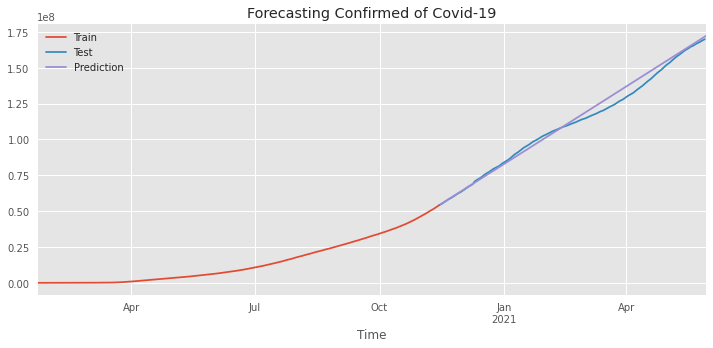

In [ ]:
plt.title('Forecasting Confirmed of Covid-19')
train_df_confirmed['Confirmed'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_df_confirmed['Confirmed'].plot(legend=True, label = 'Test')
test_predictions_confirmed.plot(legend=True, label = 'Prediction');

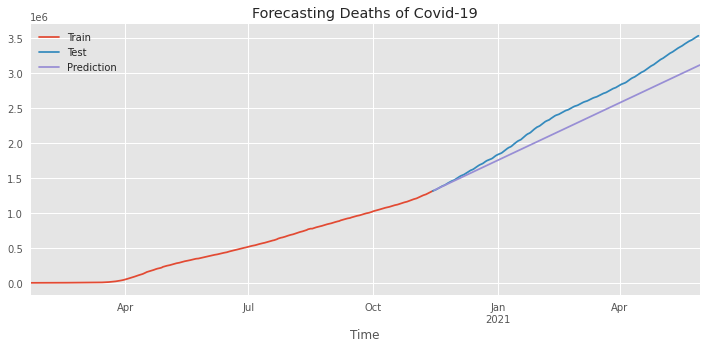

In [ ]:
plt.title('Forecasting Deaths of Covid-19')
train_df_deaths['Deaths'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_df_deaths['Deaths'].plot(legend=True, label = 'Test')
test_predictions_deaths.plot(legend=True, label = 'Prediction');

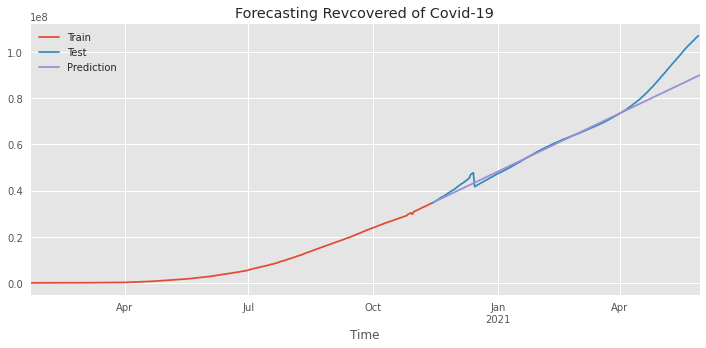

In [ ]:
plt.title('Forecasting Revcovered of Covid-19')
train_df_recovered['Recovered'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_df_recovered['Recovered'].plot(legend=True, label = 'Test')
test_predictions_recovered.plot(legend=True, label = 'Prediction');

In [ ]:
# Evaluation Metrics for data confirmed
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print("Exponential Smoothing")
print("MAE: ",mean_absolute_error(test_df_confirmed['Confirmed'],test_predictions_confirmed[:197]))
print("MSE: ",mean_squared_error(test_df_confirmed['Confirmed'],test_predictions_confirmed[:197]))
print("R2: ",r2_score(test_df_confirmed['Confirmed'],test_predictions_confirmed[:197]))
print("")

Exponential Smoothing
MAE:  2996064.0127942534
MSE:  15993689514121.371
R2:  0.9846981228265896



In [ ]:
# Evaluation Metrics for data deaths
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print("Exponential Smoothing")
print("MAE: ",mean_absolute_error(test_df_deaths['Deaths'],test_predictions_deaths[:197]))
print("MSE: ",mean_squared_error(test_df_deaths['Deaths'],test_predictions_deaths[:197]))
print("R2: ",r2_score(test_df_deaths['Deaths'],test_predictions_deaths[:197]))
print("")

Exponential Smoothing
MAE:  195338.69206341472
MSE:  52914640885.85398
R2:  0.8707096969993937



In [ ]:
# Evaluation Metrics for data recovered
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print("Exponential Smoothing")
print("MAE: ",mean_absolute_error(test_df_recovered['Recovered'],test_predictions_recovered[:197]))
print("MSE: ",mean_squared_error(test_df_recovered['Recovered'],test_predictions_recovered[:197]))
print("R2: ",r2_score(test_df_recovered['Recovered'],test_predictions_recovered[:197]))
print("")

Exponential Smoothing
MAE:  2723426.0574262543
MSE:  25599984175665.082
R2:  0.9310950320094032



## LSTM Model

In [ ]:
!pip install tensorflow

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

### Data Preprocessing

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/time_series_covid_19_confirmed%20(2).csv")

#df = df.loc[df["Country/Region"] == "Korea, South"]

# Drop column yang tidak diperlukan
df = df[df["Country/Region"] == "Korea, South"]
df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
df = pd.DataFrame(df.sum())
df = df.reset_index()
df = df.drop(['index'], axis=1)
df = df.astype('float')
df = np.array(df)

#Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

#Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

### Feature Scalling

In [ ]:
#Normalize dataset with MinMaxScaller
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
val = scaler.fit_transform(val)


# Lookback period
lookback = 3
X_train, Y_train = create_dataset(train, lookback)
X_val, Y_val = create_dataset(val, lookback)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

### Modeling

Epoch 1/50
10/10 [==============================] - 1s 31ms/step - loss: 0.0454 - val_loss: 0.6892
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0374 - val_loss: 0.6256
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0305 - val_loss: 0.5633
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.5052
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.4499
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.3976
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.3507
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.3054
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.2637
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.2286
Epoch 11/50
10/10 

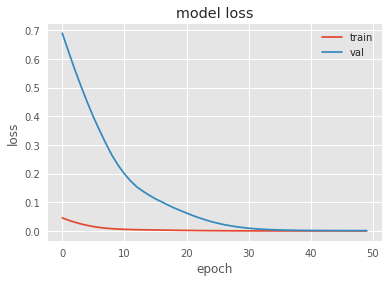

In [ ]:
model = tf.keras.Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, lookback)))
#model.add(LSTM(32, activation='relu'))
#model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=50, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train2 = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val2 = scaler.inverse_transform([Y_val])

3/3 [==============================] - 0s 2ms/step


In [ ]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train2[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val2[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 814.51 RMSE
Validation Score: 1657.87 RMSE


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

X_scaled, y_scaled = create_dataset(df_scaled, lookback)

# reshape input to be [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
prediction = model.predict(X_scaled)

16/16 [==============================] - 0s 1ms/step


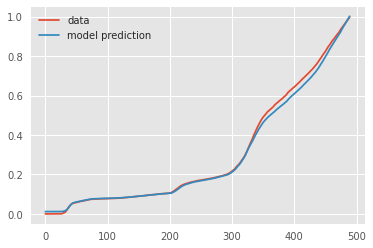

In [ ]:
#Memplot perbandingan hasil prediksi dan data
plt.plot(y_scaled)
plt.plot(prediction)
plt.legend(['data', 'model prediction'], loc='upper left')
plt.show()

# Reference

### Journal

Link GDrive : https://drive.google.com/drive/folders/1GK0SwIfbhojILhWLm4UlM47AKJYYE5sC?usp=sharing

### Website

1. Analisis Data Eksplorasi (EDA): Python
https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

2. ML | K-Medoids clustering with solved example https://www.geeksforgeeks.org/ml-k-medoids-clustering-with-example/

3.&nbsp;Understanding&nbsp;K-means&nbsp;Clustering&nbsp;in&nbsp;Machine&nbsp;Learning&nbsp;https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

4. Clustering Algoritma (K-Means) https://sis.binus.ac.id/2022/01/31/clustering-algoritma-k-means/

5. K-Means Clustering Algorithm https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

6. K-Medoid Clustering (PAM)Algorithm in Python https://towardsdatascience.com/k-medoid-clustering-pam-algorithm-in-python-with-solved-example-c0dcb35b3f46

7. Comprehensive Guide To K-Medoids Clustering Algorithm https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/

8. K-medoids Clustering  https://iq.opengenus.org/k-medoids-clustering/

9. K-Medoids Algorithm https://www.codingninjas.com/codestudio/library/k-medoids-algorithm

10. #SuperNaive: K-medoids clustering https://medium.com/analytics-vidhya/supernaive-k-medoids-clustering-31db7bfc5075

11. K-Medoids Clustering Algorithm https://pianalytix.com/k-medoids-clustering-algorithm/

12. K-Means Clustering Algorithm Implementation https://towardsdatascience.com/k-means-clustering-algorithm-implementation-da0f735ab0f9#:~:text=When%20it%20comes%20to%20popularity,that%20are%20to%20be%20formed.

13. Step by Step to Understanding K-means Clustering and&nbsp;Implementation with sklearn https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6

14. IMPLEMENTATION OF K-MEANS CLUSTERING ALGORITHM USING PYTHON https://hands-on.cloud/implementation-of-k-means-clustering-algorithm-using-python/

15. Understanding K-means Clustering in Machine Learning(With Examples) https://www.analyticsvidhya.com/blog/2021/11/understanding-k-means-clustering-in-machine-learningwith-examples/

16. K-Means Clustering in Python: A Practical Guide https://realpython.com/k-means-clustering-python/

17. Clustering Algorithms - K-means Algorithm https://www.tutorialspoint.com/machine_learning_with_python/clustering_algorithms_k_means_algorithm.htm

18. K means Clustering – Introduction https://www.geeksforgeeks.org/k-means-clustering-introduction/

19. In Depth: k-Means Clustering https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

20. A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/#:~:text=Exponential%20smoothing%20is%20a%20time,Jenkins%20ARIMA%20family%20of%20methods.

21. Exponential smoothing https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

22. Time Series in Python — Exponential Smoothing and ARIMA processes https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

23. Hands-On Guide to Time Series Analysis using Simple Exponential Smoothing in Python https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/

24. Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

25. Exploring the LSTM Neural Network Model for Time Series https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf

26. Complete Guide To Bidirectional LSTM (With Python Codes) https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/ 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c4be797-6ded-4ee5-84e8-c5f3044bd915' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>